In [1]:
# Source code: https://machinelearningmastery.com/machine-learning-in-python-step-by-step/
# Additional list of ML methods:
## https://www.analyticsvidhya.com/blog/2017/09/common-machine-learning-algorithms/
## https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html


In [2]:
# Compare algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [3]:
url = "/home/jos/tf_lab/Ultralight-SimplePose/generator_dataset/dataset_file3.csv"
data_title = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','res']

dataset = read_csv(url, names=data_title)
# Split-out validation dataset
array = dataset.values

X = array[:,[5,6,11,12,13,14,15,16]]
y = array[:,len(data_title)-1]
data_title = ['5','6','11','12','13','14','15','16','res']
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)

In [4]:

# Spot Check Algorithms
models = []
models.append(('AB', AdaBoostClassifier()))
models.append(('SGD', SGDClassifier()))
models.append(('NNMLP', MLPClassifier(alpha=1, max_iter=1000)))
models.append(('GB', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

AB : 0.991489 (0.009440)
SGD : 0.978853 (0.025386)
NNMLP : 0.998592 (0.004225)
GB : 0.994346 (0.006925)
RF : 0.997163 (0.005674)
KNN : 0.998592 (0.004225)
CART : 0.994346 (0.009361)
NB : 0.994346 (0.006925)
SVM : 0.717706 (0.070830)


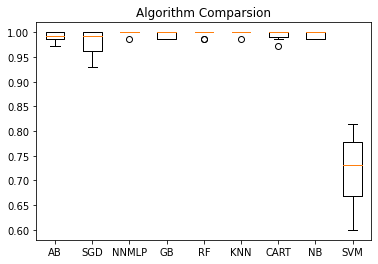

In [11]:
# evaluate each model in Turn
results = []
names = []
selectedName = ""
selectedModel = ""
largestAccuracy = 0
for name,model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s : %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Comparison
pyplot.boxplot(results, labels = names)
pyplot.title('Algorithm Comparsion')
pyplot.show()

In [12]:


n = len(data_title)-1;
currentlargestAccuracy_perReducedSize = largestAccuracy;
current_combinations_removedColumnIndex_Sets = list();
current_X_train = X_train.copy();
bestlargestAccuracy_perReducedSize = largestAccuracy;
best_combinations_removedColumnIndex_Sets = list();
best_X_train = X_train.copy();
initial_column_index = list(range(0,len(data_title)-1))
r = 1;
copy_of_data_title = data_title.copy();
for iteration in range(1, len(data_title)-1):

	largestAccuracy_sameReducedSize = 0;
	selectedSet_combinations_removedColumnIndex = list();
	
	# find combinations in a set (n_C_r)
	# start with the next largest number of input parameters = n-1
	# (if a better accuracy is obtained, then reduce the number of input parameters (from the current best combination), until the accuracy is not improved anymore, etc)
	# source code: https://www.baeldung.com/java-combinations-algorithm
	
	combinations_removedColumnIndex_Sets = list();
	combination = [None] * r
    # initialize with lowest lexicographic combination
	for i in range(0, r):
		combination[i] = i;
	
	while combination[r-1] < n:
		combinations_removedColumnIndex_Sets += [combination.copy()]
		
		# generate next combination in lexicographic order
		t = r - 1;
		while t != 0 and combination[t] == n - r + t:
			t -= 1;
		combination[t] += 1;
		for i in range(t+1, r):
			combination[i] = combination[i-1] + 1;
	
	kfold = StratifiedKFold(n_splits=10, random_state=random_value, shuffle=True)
	for i in range(0, len(combinations_removedColumnIndex_Sets)):

		random_seed = random.seed(random_value);

		print("i = ", i, "; len(combinations_removedColumnIndex_Sets) = ", len(combinations_removedColumnIndex_Sets));
		reduced_X_train = current_X_train.copy()
		reduced_X_train = np.delete(reduced_X_train,combinations_removedColumnIndex_Sets[i][0],1);

		# Retest accuracy with the reduced data
		cv_results = cross_val_score(model, reduced_X_train, Y_train, cv=kfold, scoring='accuracy')
		optimized_parameters = model.get_params(deep=True)
		results.append(cv_results)
		names.append(name)
		if (cv_results.mean() > largestAccuracy_sameReducedSize):
			largestAccuracy_sameReducedSize = cv_results.mean();
			selectedSet_combinations_removedColumnIndex = i;

	currentlargestAccuracy_perReducedSize = largestAccuracy_sameReducedSize;
	current_X_train = np.delete(current_X_train,combinations_removedColumnIndex_Sets[selectedSet_combinations_removedColumnIndex][0],1);
	current_combinations_removedColumnIndex_Sets += [initial_column_index[combinations_removedColumnIndex_Sets[selectedSet_combinations_removedColumnIndex][0]]];
	del initial_column_index[combinations_removedColumnIndex_Sets[selectedSet_combinations_removedColumnIndex][0]];
	del copy_of_data_title[combinations_removedColumnIndex_Sets[selectedSet_combinations_removedColumnIndex][0]];
	print("currentlargestAccuracy_perReducedSize, data_title: ", currentlargestAccuracy_perReducedSize, "; ", copy_of_data_title, "(", initial_column_index, ")");
	n -= 1;

	if largestAccuracy_sameReducedSize >= bestlargestAccuracy_perReducedSize:
		bestlargestAccuracy_perReducedSize = currentlargestAccuracy_perReducedSize;
		best_X_train = current_X_train.copy();
		best_combinations_removedColumnIndex_Sets = current_combinations_removedColumnIndex_Sets.copy();
		data_title = copy_of_data_title.copy();

NameError: name 'random_value' is not defined

In [13]:

# Obtain input data combination with the best accuracy
best_combinations_removedColumnIndex_Sets.sort();
X_train = best_X_train.copy()
for j in range(len(best_combinations_removedColumnIndex_Sets)-1,-1,-1):
	X_validation = np.delete(X_validation,best_combinations_removedColumnIndex_Sets[j],1);

# Retrain model (using important input data)
kfold = StratifiedKFold(n_splits=10, random_state=random_value, shuffle=True);
cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy');
optimized_parameters = model.get_params(deep=True);
results.append(cv_results);
names.append(name);
print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()));
print();

print("data_title:");
print(data_title);
print();

print()
print('Prediction step')
# Make predictions on validation dataset
print()
print('selectedName = ',selectedName)
selectedModel.fit(X_train, Y_train)
predictions = selectedModel.predict(X_validation)


# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))


NameError: name 'random_value' is not defined